<a href="https://colab.research.google.com/github/MohanPatil1/DS-And-DA-Assignments/blob/main/SVM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score

In [4]:
filename = '/content/pima-indians-diabetes.data.csv'
names = ['preg','plas','pres','skin','test','mass','pedi','age','class']
dataframe = pd.read_csv(filename,names=names)
array = dataframe.values
X = array [:,0:8]
Y = array [:,8]

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

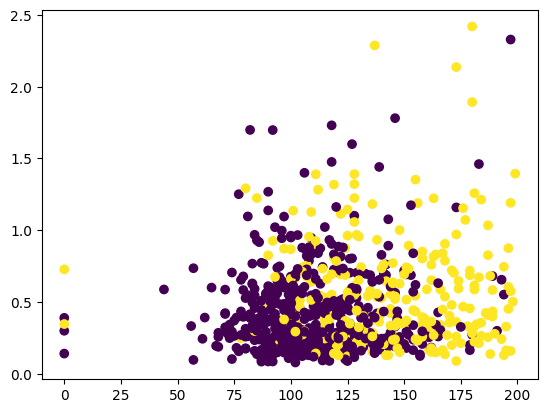

In [7]:
import matplotlib.pyplot as plt
plt.scatter(dataframe['plas'],dataframe['pedi'],c=dataframe['class'])

In [10]:
clf = SVC(kernel='rbf',gamma=0.0001)
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test,y_pred)*100
print("Accuracy=",acc)
confusion_matrix(Y_test,y_pred)

Accuracy= 77.05627705627705


array([[139,  12],
       [ 41,  39]])

# Grid Search CV

In [12]:
# To Get optimal Value of gamma use grid search cv
clf = SVC()
# Can put ['linear','rbf','poly'],give range for gamma i.e C as regularization parameter
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5,1,0.0001],'C':[1,15,14,13,12,11,10,0.1]}]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 15, 14, 13, 12, 11, 10, 0.1],
                          'gamma': [50, 5, 10, 0.5, 1, 0.0001],
                          'kernel': ['rbf']}])

In [14]:
gsv.best_params_,gsv.best_score_

({'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}, 0.7429769392033542)

In [15]:
clf = SVC(C=1,gamma=0.0001,kernel='rbf')
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test) # Predict on test Dataset
acc = accuracy_score(Y_test,y_pred)*100
print("Accuracy=",acc)
confusion_matrix(Y_test,y_pred)

Accuracy= 77.05627705627705


array([[139,  12],
       [ 41,  39]])

In [19]:
(139+39)/(139+39+41+12)

0.7705627705627706